In [1]:
#import SparkSession 
from pyspark.sql import SparkSession

In [2]:
# create spark session from builder
spark = SparkSession.builder\
                     .appName('Analyzing London Crime Data')\
                     .getOrCreate()

In [3]:
london_crime_details_data_path = r'C:\\Hadoop\\Data\\london_crime_by_lsoa.csv'

In [4]:
# read csv file by inferring schema and header
london_crime_data =  spark.read.format('csv')\
                               .option('header', 'true')\
                               .option('inferSchema', 'true')\
                               .load(london_crime_details_data_path) 

In [5]:
# to check the schema of a data frame
london_crime_data.printSchema()

root
 |-- lsoa_code: string (nullable = true)
 |-- borough: string (nullable = true)
 |-- major_category: string (nullable = true)
 |-- minor_category: string (nullable = true)
 |-- value: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)



In [6]:
# number of records in the data frame 
london_crime_data.count()

13490604

In [7]:
# limit top2 records and show the results
london_crime_data.limit(5).show()

+---------+----------+--------------------+--------------------+-----+----+-----+
|lsoa_code|   borough|      major_category|      minor_category|value|year|month|
+---------+----------+--------------------+--------------------+-----+----+-----+
|E01001116|   Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
|E01001646| Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|E01000677|   Bromley|Violence Against ...|      Other violence|    0|2015|    5|
|E01003774| Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|E01004563|Wandsworth|             Robbery|   Personal Property|    0|2008|    6|
+---------+----------+--------------------+--------------------+-----+----+-----+



In [8]:
# data cleaning process
# drop all rows with na
# drop column lsoa_code
london_crime_data.dropna()
data = london_crime_data.drop('lsoa_code')

In [9]:
data.show(5)

+----------+--------------------+--------------------+-----+----+-----+
|   borough|      major_category|      minor_category|value|year|month|
+----------+--------------------+--------------------+-----+----+-----+
|   Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
| Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|   Bromley|Violence Against ...|      Other violence|    0|2015|    5|
| Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|Wandsworth|             Robbery|   Personal Property|    0|2008|    6|
+----------+--------------------+--------------------+-----+----+-----+
only showing top 5 rows



In [10]:
#filter data 
hackney_data = data.filter(data['borough'] == 'Hackney')
hackney_data.show(5)
hackney_data.count()

+-------+--------------------+--------------------+-----+----+-----+
|borough|      major_category|      minor_category|value|year|month|
+-------+--------------------+--------------------+-----+----+-----+
|Hackney|     Criminal Damage|Criminal Damage T...|    0|2011|    6|
|Hackney|Violence Against ...|          Harassment|    1|2013|    2|
|Hackney|     Criminal Damage|Other Criminal Da...|    0|2011|    7|
|Hackney|Violence Against ...|        Wounding/GBH|    0|2013|   12|
|Hackney|  Theft and Handling|  Other Theft Person|    0|2016|    8|
+-------+--------------------+--------------------+-----+----+-----+
only showing top 5 rows



417744

In [11]:
# multi value filter, filter data frame with year as 2015 and 2016
data_2015_2016 = data.filter(data['year'].isin(['2015','2016']))
data_2015_2016.show(5)

+---------+--------------------+--------------------+-----+----+-----+
|  borough|      major_category|      minor_category|value|year|month|
+---------+--------------------+--------------------+-----+----+-----+
|  Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
|Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|  Bromley|Violence Against ...|      Other violence|    0|2015|    5|
|Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|   Sutton|  Theft and Handling|Theft/Taking of P...|    1|2016|    8|
+---------+--------------------+--------------------+-----+----+-----+
only showing top 5 rows



In [12]:
# filter data with a condition of >=
data_2014_and_above = data.filter(data['year'] >= 2014)
data_2014_and_above.show(5)
data_2014_and_above.count()

+---------+--------------------+--------------------+-----+----+-----+
|  borough|      major_category|      minor_category|value|year|month|
+---------+--------------------+--------------------+-----+----+-----+
|  Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
|Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|  Bromley|Violence Against ...|      Other violence|    0|2015|    5|
|Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|   Sutton|  Theft and Handling|Theft/Taking of P...|    1|2016|    8|
+---------+--------------------+--------------------+-----+----+-----+
only showing top 5 rows



4496868

In [13]:
#query - get number of borough in each borough
borough_count = data.groupBy(data['borough']).count()
borough_count.show()
borough_count.count()

+--------------------+------+
|             borough| count|
+--------------------+------+
|             Croydon|602100|
|          Wandsworth|498636|
|              Bexley|385668|
|             Lambeth|519048|
|Barking and Dagenham|311040|
|              Camden|378432|
|           Greenwich|421200|
|              Newham|471420|
|       Tower Hamlets|412128|
|            Hounslow|395928|
|              Barnet|572832|
|              Harrow|365688|
|Kensington and Ch...|296784|
|           Islington|359208|
|               Brent|490644|
|            Haringey|413856|
|             Bromley|523908|
|              Merton|339876|
|         Westminster|366660|
|             Hackney|417744|
+--------------------+------+
only showing top 20 rows



33

In [14]:
# query - get number of convictions in each borough
# rename column sum(value) to "convictions"
borough_conviction_sum = data.groupBy(data['borough'])\
                             .agg({'value':'sum'})\
                             .withColumnRenamed('sum(value)', 'convictions')
borough_conviction_sum.show()

#query total number of convictions 
total_borough_convictions = data.agg({'value': 'sum'})
total_borough_convictions.show()
total_convictions = total_borough_convictions.collect()[0][0]
print(total_convictions)

total_borough_convictions = borough_conviction_sum.agg({'convictions': 'sum'})
total_borough_convictions.show()
total_convictions = total_borough_convictions.collect()[0][0]
print(total_convictions)

+--------------------+-----------+
|             borough|convictions|
+--------------------+-----------+
|             Croydon|     260294|
|          Wandsworth|     204741|
|              Bexley|     114136|
|             Lambeth|     292178|
|Barking and Dagenham|     149447|
|              Camden|     275147|
|           Greenwich|     181568|
|              Newham|     262024|
|       Tower Hamlets|     228613|
|            Hounslow|     186772|
|              Barnet|     212191|
|              Harrow|     116848|
|Kensington and Ch...|     171981|
|           Islington|     230286|
|               Brent|     227551|
|            Haringey|     213272|
|             Bromley|     184349|
|              Merton|     115654|
|         Westminster|     455028|
|             Hackney|     217119|
+--------------------+-----------+
only showing top 20 rows

+----------+
|sum(value)|
+----------+
|   6447758|
+----------+

6447758
+----------------+
|sum(convictions)|
+----------------+
|  

In [15]:
# find percentage of crime convictions in each borough
import pyspark.sql.functions as func
borough_percentage_contribution = borough_conviction_sum.withColumn(
  "% Conviction",                 
  func.round((borough_conviction_sum.convictions / total_convictions) * 100, 2)  
)
borough_percentage_contribution.printSchema()
borough_percentage_contribution.show()

root
 |-- borough: string (nullable = true)
 |-- convictions: long (nullable = true)
 |-- % Conviction: double (nullable = true)

+--------------------+-----------+------------+
|             borough|convictions|% Conviction|
+--------------------+-----------+------------+
|             Croydon|     260294|        4.04|
|          Wandsworth|     204741|        3.18|
|              Bexley|     114136|        1.77|
|             Lambeth|     292178|        4.53|
|Barking and Dagenham|     149447|        2.32|
|              Camden|     275147|        4.27|
|           Greenwich|     181568|        2.82|
|              Newham|     262024|        4.06|
|       Tower Hamlets|     228613|        3.55|
|            Hounslow|     186772|         2.9|
|              Barnet|     212191|        3.29|
|              Harrow|     116848|        1.81|
|Kensington and Ch...|     171981|        2.67|
|           Islington|     230286|        3.57|
|               Brent|     227551|        3.53|
|     

In [17]:
# order by descending based on the % conviction
# since % conviction is in column 3, use index as (3-1) = 2
borough_percentage_contribution.orderBy(borough_percentage_contribution[2].desc()).show(10)

+-------------+-----------+------------+
|      borough|convictions|% Conviction|
+-------------+-----------+------------+
|  Westminster|     455028|        7.06|
|      Lambeth|     292178|        4.53|
|    Southwark|     278809|        4.32|
|       Camden|     275147|        4.27|
|       Newham|     262024|        4.06|
|      Croydon|     260294|        4.04|
|       Ealing|     251562|         3.9|
|    Islington|     230286|        3.57|
|Tower Hamlets|     228613|        3.55|
|        Brent|     227551|        3.53|
+-------------+-----------+------------+
only showing top 10 rows



In [18]:
# get count of convictions in 2014 month on month and then find percentage of each month
data_2014_for_each_month = data.filter(data['year'] == 2014)\
                               .groupBy(data['month'])\
                               .agg({'value':'sum'})\
                               .withColumnRenamed('sum(value)', 'convictions')  
total_convictions_in_2014 = data_2014_for_each_month.agg({'convictions':'sum'}).collect()[0][0]
data_2014_for_each_month = data_2014_for_each_month.withColumn('percent',
        func.round((data_2014_for_each_month.convictions/total_convictions_in_2014) * 100, 2)                     
)
data_2014_for_each_ordered = data_2014_for_each_month.orderBy(data_2014_for_each_month.percent.desc())
data_2014_for_each_ordered.show()

+-----+-----------+-------+
|month|convictions|percent|
+-----+-----------+-------+
|   10|      60537|    8.9|
|   11|      59704|   8.78|
|    7|      58564|   8.61|
|    3|      57669|   8.48|
|   12|      57565|   8.46|
|    6|      57039|   8.39|
|    9|      56933|   8.37|
|    5|      56327|   8.28|
|    8|      55641|   8.18|
|    1|      55515|   8.16|
|    4|      53467|   7.86|
|    2|      51222|   7.53|
+-----+-----------+-------+



In [19]:
# Find number of convictions for each major_category
crimes_by_category = data.groupBy(data.major_category)\
                         .agg({'value':'sum'})\
                        .withColumnRenamed('sum(value)', 'convictions')
crimes_by_category_ordered = crimes_by_category.orderBy(crimes_by_category.convictions.desc())
crimes_by_category_ordered.show()

+--------------------+-----------+
|      major_category|convictions|
+--------------------+-----------+
|  Theft and Handling|    2661861|
|Violence Against ...|    1558081|
|            Burglary|     754293|
|     Criminal Damage|     630938|
|               Drugs|     470765|
|             Robbery|     258873|
|Other Notifiable ...|     106349|
|    Fraud or Forgery|       5325|
|     Sexual Offences|       1273|
+--------------------+-----------+



In [20]:
year_df = data.select('year').distinct().orderBy(data.year.desc())
year_df.show()

+----+
|year|
+----+
|2016|
|2015|
|2014|
|2013|
|2012|
|2011|
|2010|
|2009|
|2008|
+----+



In [21]:
# minimum year
min_year = year_df.agg({'year': 'min'})
min_year.show()

# maximum year
max_year = year_df.agg({'year': 'max'})
max_year.show()

#describe statistics of a data frame
year_df.describe().show()

+---------+
|min(year)|
+---------+
|     2008|
+---------+

+---------+
|max(year)|
+---------+
|     2016|
+---------+

+-------+------------------+
|summary|              year|
+-------+------------------+
|  count|                 9|
|   mean|            2012.0|
| stddev|2.7386127875258306|
|    min|              2008|
|    max|              2016|
+-------+------------------+



In [22]:
#pivoting , cross tab
cross_tab_data = data.crosstab('borough', 'major_category')\
                     .select('borough_major_category', 'Drugs', 'Robbery', 'Burglary', 'Fraud or Forgery')
cross_tab_data.show()

+----------------------+-----+-------+--------+----------------+
|borough_major_category|Drugs|Robbery|Burglary|Fraud or Forgery|
+----------------------+-----+-------+--------+----------------+
|              Havering|32616|  27648|   32400|            5508|
|                Merton|29160|  23652|   26784|            5724|
|              Haringey|35424|  29484|   31320|           10368|
|         Tower Hamlets|37368|  28512|   31104|            5400|
|               Bromley|42336|  34668|   42552|            8532|
|               Enfield|44064|  35532|   39528|            9720|
|  Kingston upon Thames|22140|  15660|   21168|            3780|
|           Westminster|32616|  25056|   27648|            8748|
|  Richmond upon Thames|23004|  18468|   24840|            2808|
|              Lewisham|43740|  34884|   36504|           11016|
|                 Brent|46980|  34128|   37368|            9288|
|  Barking and Dagenham|26244|  22248|   23760|            7236|
|             Redbridge|3

In [25]:
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [30]:
def describe_year(year):
    yearly_details = data.filter(data.year == year) \
                         .groupBy(data.borough)\
                         .agg({'value':'sum'})\
                         .withColumnRenamed('sum(value)','convictions')
    
    # to use local iterators to iterate with in RDD to read each column value    
    borough_list = [x[0] for x in yearly_details.toLocalIterator()]
    convictions_list = [x[1] for x in yearly_details.toLocalIterator()]
    
    plt.figure(figsize=(33,10))
    plt.bar(borough_list, convictions_list)
    
    #convert int to string, using str function
    
    plt.title('Crime details for year' + str(year), fontsize=30)
    plt.xlabel('Boroughs', fontsize=30)
    plt.ylabel('Convictions', fontsize=30)
    
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=90)
    
    plt.autoscale()
    plt.show()

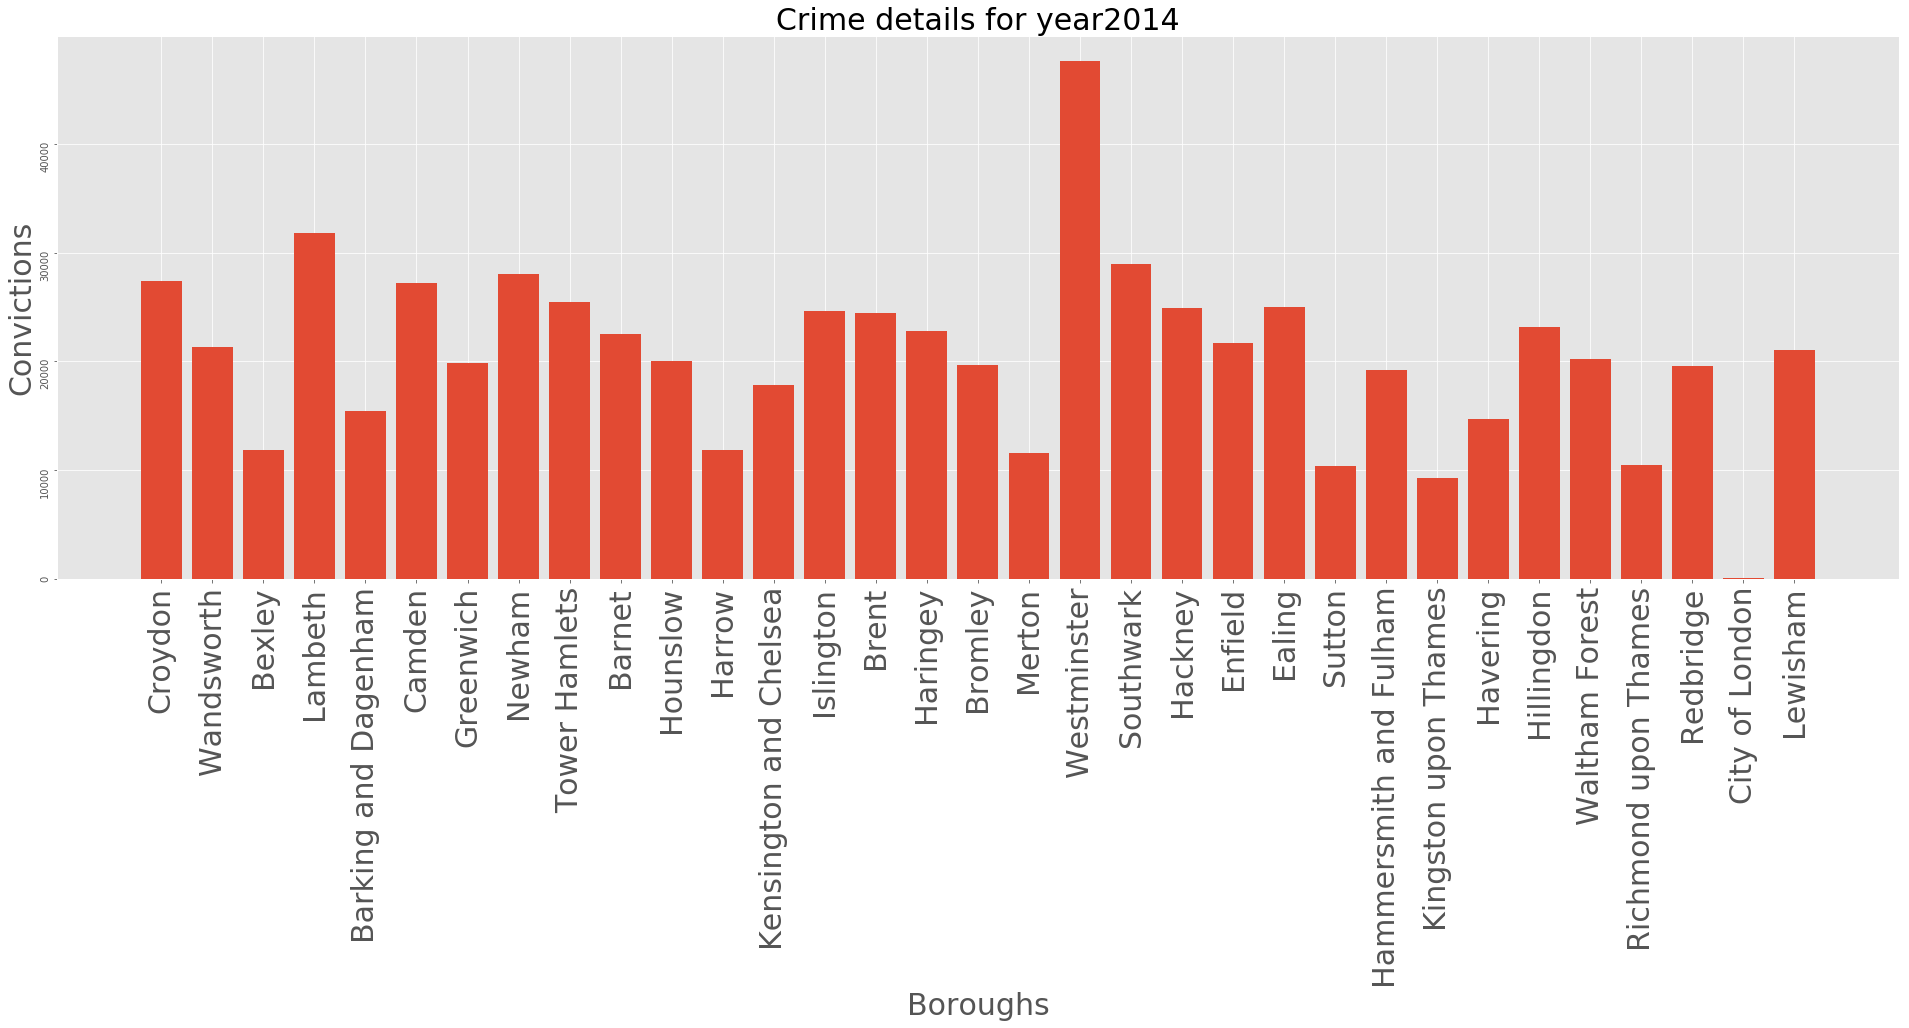

In [31]:
describe_year(2014)